# Explotation of transcriptomics data

This is to explore the transcriptomics data.

In [120]:
# First we load some libraries that we always need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
# the folder to fetch files from
path = '.'
# We only keep the file ending with xlsx, that is, the excel files
filename = path + "/" + "InvivoVIII_males_ Master_ JOZ.xlsx"

In [141]:
df_raw = pd.read_excel(filename)

In [142]:
df = df_raw.dropna().reset_index(drop=True)

In [143]:
exposure = df['Exposure']
sample_id = df['Sample Id']
df_value = df.iloc[0:, 2:]

In [144]:
# normalize to zero mean unit variance for each column
df_norm = (df_value - df_value.mean()) / df_value.std()

In [145]:
#df_norm = df_norm.iloc[:, :7]

In [146]:
df_norm.head()

Sperm concentration %  Sperm motility %  Gonadosomal index %  \
0               0.808876          2.200335            -0.684515   
1               0.971827          0.094647             0.555179   
2               0.392084         -0.432358             0.842313   
3               1.021167          0.346490             0.415989   
4              -0.003284         -1.006001             0.963532   

   Condition factor %  17b-estradiol (E2) ng/ml  Testosterone (T) ng/ml  \
0           -0.306693                 -0.218417               -0.161031   
1            0.817825                 -0.415476                1.300329   
2            0.604229                 -0.156749               -0.979019   
3            0.313484                 -0.415476               -0.039263   
4           -0.247016                  0.102355                0.384920   

   Vitellogenin µg/ml     hspa8    Igf1ra      bdnf      fshr      esr1  \
0           -0.172415  1.489200 -0.541105  0.482225 -0.470708  0.379440   
1           -0.173562 -0.092741 -1.440438 -0.206821 -1.254707 -0.432876   
2           -0.174389 -0.474314  0.625778  1.879604  1.456548  0.085629   
3           -0.144527  2.393128 -0.919506 -0.738867 -0.989631 -0.486663   
4           -0.172207 -0.007134 -0.870681 -0.913719 -0.783046 -0.461045   

    20b-hsd    3b-hsd     cyp11     cyp17     cyp19      StAR  
0 -0.063339 -0.243604 -0.696730 -0.258142  0.342432 -1.043861  
1 -0.425426 -0.259663 -0.902977 -0.281023 -0.327754 -1.330769  
2  0.661578 -0.165937  1.736040 -0.241649 -0.198225  0.200086  
3 -0.904678 -0.293938 -0.703090 -0.217748 -0.406185 -1.039803  
4 -0.531582 -0.284109 -0.406842 -0.252562 -0.475357 -0.774227

## Do PCA, t-SNE, UMAP and Visualization


We define a helper function for plotting. It takes several inputs.
* X is two-dimensional data that will be plotted by placing abbreviated dose names in the appropritat position on the plane
* y_text holds the samples
* y_color specifies the colors. To begin with we want text and color to correspond.

In [148]:
from itertools import cycle, islice
def plot_embedding(X, y_text, y_color=None, title=None, colors=None):
    if y_color is None:
        y_color = y_text
    if colors is None:
        palette = np.vstack((plt.cm.tab10(np.arange(10)), plt.cm.Set3(np.arange(12))))
        palette = np.array(list(islice(cycle(palette), len(np.unique(y_color)))))
        colors = {}
        for idx, value in enumerate(np.unique(y_color)):
            colors[value] = palette[idx]
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    dimensions = x_max - x_min
    x_max = x_max + 0.1*dimensions
    x_min = x_min - 0.05*dimensions

    #plt.figure()
    ax = plt.subplot(111)
    ax.set_xlabel('Principal Component 1', fontsize = 12)
    ax.set_ylabel('Principal Component 2', fontsize = 12)
    ax.set_title('PCA with all features', fontsize = 12)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_text[i]),
                 color=colors[y_color[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xlim([x_min[0], x_max[0]])
    plt.ylim([x_min[1], x_max[1]])
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Make a list of dosage abbreviations

In [149]:
samples = sample_id
y_dose = np.empty(len(exposure), dtype=int)
for idx, dose in enumerate(np.unique(exposure)):
    y_dose[np.array(exposure) == dose] = idx

### Plot the data

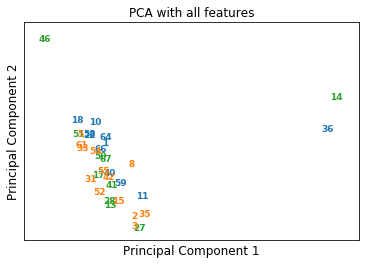

In [150]:
# Import PCA module
from sklearn.decomposition import PCA
# Fit and transform PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df_norm)
plot_embedding(X, 
               samples, 
               y_color=y_dose, colors=None)
plt.savefig('pca_all_features.pdf')

In [74]:
# The most important features
pd_df = pd.DataFrame(pca.components_)
index0 = list(abs(pd_df.iloc[0])).index(max(abs(pd_df.iloc[0])))
print(index0, pd_df.iloc[0, index0], list(df_trans.columns)[index0])
index1 = list(abs(pd_df.iloc[1])).index(max(abs(pd_df.iloc[1])))
print(index1, pd_df.iloc[1, index1], list(df_trans.columns)[index1])

11 0.37513331720259063 11
10 -0.4703309439473617 10
